In [1]:
import numpy as np
import matplotlib.pyplot as plt
from transformers.image_utils import load_image
from functools import cache

In [2]:
@cache
def load_local_image(name):
    return load_image(f'https://raw.githubusercontent.com/hocop/sirius2026/main/{name}')

# Картинки в numpy

yellow_image.shape=(4, 4, 3)


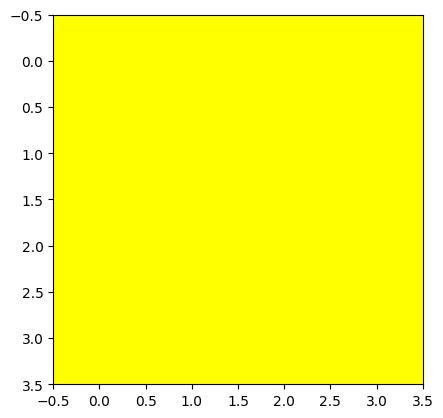

In [3]:
yellow_image = np.array([
    [[1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0]],
    [[1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0]],
    [[1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0]],
    [[1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0]],
], dtype=float)

print(f'{yellow_image.shape=}')
plt.imshow(yellow_image);

In [4]:
print(f'{yellow_image[0, 0]=}')  # верхний левый угол
print(f'{yellow_image[-1, 0]=}')  # нижний левый угол
print(f'{yellow_image[0, -1]=}')  # верхний правый угол
print(f'{yellow_image[-1, -1]=}')  # нижний правый угол

yellow_image[0, 0]=array([1., 1., 0.])
yellow_image[-1, 0]=array([1., 1., 0.])
yellow_image[0, -1]=array([1., 1., 0.])
yellow_image[-1, -1]=array([1., 1., 0.])


## Задание
Попробуйте нарисовать что-нибудь, меняя цвета в массиве.

Можно делать больше пикселей!

# Настоящие картинки

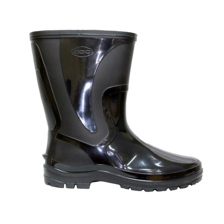

In [5]:
size = (224, 224)

boot_1 = load_local_image('images/boot_1.png').resize(size)
boot_1

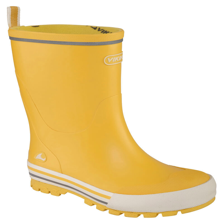

In [6]:
boot_2 = load_local_image('images/boot_2.png').resize(size)
boot_2

In [7]:
# Посмотрим на изображение ботинка как на массив
boot_2_np = np.array(boot_2) / 255
boot_2_np

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], shape=(224, 224, 3))

In [8]:
# возьмем пиксель из центра
# объясните, как этот код берет пиксель "из центра"?
# что это за цвет?
print(boot_2_np[size[1] // 2, size[0] // 2])

[0.9254902  0.7254902  0.27058824]


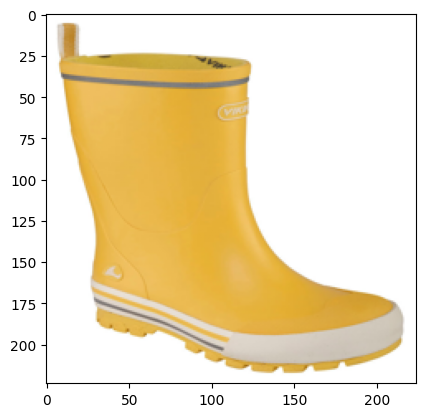

In [9]:
# Как вывести numpy массив:
plt.imshow(boot_2_np);

In [10]:
def l1_distance(vec_1, vec_2):
    difference = vec_1 - vec_2
    return np.abs(difference).mean()

$$L_1: d(\vec x, \vec y) = |x_1-y_1| + ... + |x_N-y_N|$$

In [11]:
def simple_image_distance(img_1, img_2):
    img_1_np = np.array(img_1) / 255
    img_2_np = np.array(img_2) / 255
    return l1_distance(img_1_np, img_2_np)

In [12]:
def colors_distance(img_1, img_2):
    img_1_np = np.array(img_1) / 255
    img_2_np = np.array(img_2) / 255
    mean_color_1 = img_1_np.mean((0, 1))
    mean_color_2 = img_2_np.mean((0, 1))
    return l1_distance(mean_color_1, mean_color_2)

In [13]:
items = [
    {'name': 'boot_1'},
    {'name': 'boot_2'},
    {'name': 'brick'},
    {'name': 'cap'},
]

for item in items:
    item['image'] = load_local_image(f'images/{item["name"]}.png').resize(size)

items

[{'name': 'boot_1', 'image': <PIL.Image.Image image mode=RGB size=224x224>},
 {'name': 'boot_2', 'image': <PIL.Image.Image image mode=RGB size=224x224>},
 {'name': 'brick', 'image': <PIL.Image.Image image mode=RGB size=224x224>},
 {'name': 'cap', 'image': <PIL.Image.Image image mode=RGB size=224x224>}]

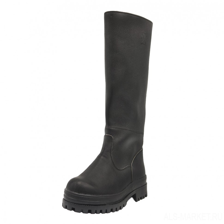

In [15]:
query_image = load_local_image(f'images/boot_query.png').resize(size)
query_image

In [16]:
for item in items:
    print(f'Distance to {item["name"]}: {simple_image_distance(query_image, item["image"]):.02f}')

Distance to boot_1: 0.25
Distance to boot_2: 0.23
Distance to brick: 0.36
Distance to cap: 0.28


In [17]:
for item in items:
    print(f'Distance to {item["name"]}: {colors_distance(query_image, item["image"]):.02f}')

Distance to boot_1: 0.10
Distance to boot_2: 0.09
Distance to brick: 0.22
Distance to cap: 0.21


## Задание
Напишите функцию, которая находит имя ближайшего item-а, используя simple_image_distance

In [18]:
def find_closest_item(query_image, items):
    ...
    return name

In [19]:
# find_closest_item(query_image, items)  # должно выдать "boot_2"

# SigLip

In [20]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
import torch
from transformers import AutoModel, AutoProcessor
from transformers.image_utils import load_image

# load the model and processor
ckpt = "google/siglip2-base-patch16-224"
model = AutoModel.from_pretrained(ckpt).eval()
processor = AutoProcessor.from_pretrained(ckpt)

# load the image
inputs = processor(images=[query_image], return_tensors="pt").to(model.device)

# run infernece
with torch.no_grad():
    image_embeddings = model.get_image_features(**inputs)

print(image_embeddings.shape)

In [ ]:
def embed(image):
    # load the image
    inputs = processor(images=[image], return_tensors="pt").to(model.device)
    
    # run infernece
    with torch.no_grad():
        image_embeddings = model.get_image_features(**inputs)
    return image_embeddings.cpu().numpy()[0]

In [ ]:
query_emb = embed(query_image)

for item in items:
    image_emb = embed(item["image"])
    print(f'Distance to {item["name"]}: {l1_distance(query_emb, image_emb):.02f}')

## Задание
Посчитайте скоры с помощью косинусной близости

$$cos: s(\vec x, \vec y) = \frac{\langle \vec x,\vec y \rangle}{|\vec x||\vec y|}\in [-1, 1]$$